In [1]:
from google.colab import files
uploaded = files.upload()

Saving flats_moscow.csv to flats_moscow.csv


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

import io

data = pd.read_csv(io.StringIO(uploaded['flats_moscow.csv'].decode('utf-8')))

(array([170., 908., 570., 229.,  70.,  40.,  17.,   8.,   8.,   7.,   3.,
          4.,   4.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([ 50.,  84., 118., 152., 186., 220., 254., 288., 322., 356., 390.,
        424., 458., 492., 526., 560., 594., 628., 662., 696., 730.]),
 <a list of 20 Patch objects>)

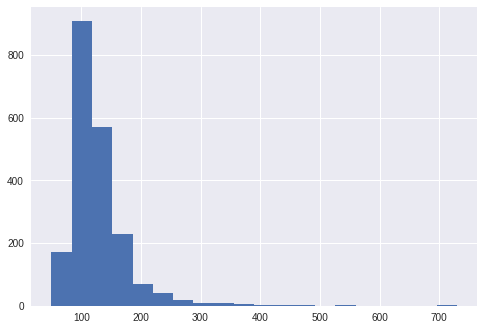

In [3]:
import matplotlib.pyplot as plt
plt.hist(data['price'], bins = 20)

In [4]:
price = np.log2(data['price'])
std = price.std()
df = data[(price.mean()-3*std<price) & (price.mean()+3*std>price)]
df1 = data[((np.log(data['price']))<np.log(data['price']).quantile(0.75)+1.5*(np.log(data['price']).quantile(0.75)-np.log(data['price']).quantile(0.25)))&
         ((np.log(data['price']))>np.log(data['price']).quantile(0.25)-1.5*(np.log(data['price']).quantile(0.75)-np.log(data['price']).quantile(0.25)))]
print df.shape, df1.shape

(2010, 11) (1986, 11)


{'boxes': [<matplotlib.lines.Line2D at 0x7f58c9052590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f58c9052d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f58c905f910>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f58c905f550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f58c9088cd0>,
  <matplotlib.lines.Line2D at 0x7f58c9052990>]}

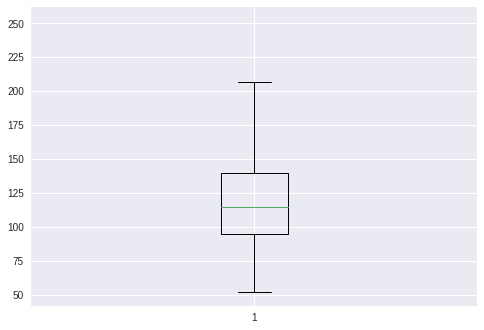

In [5]:
plt.boxplot(df1[u'price'])

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


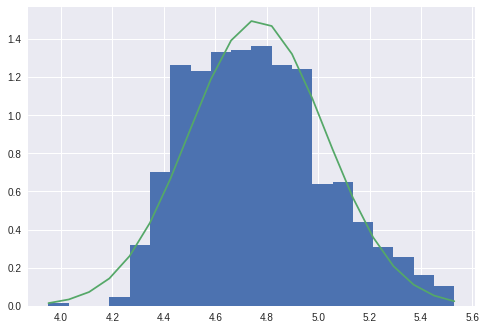

In [6]:
import matplotlib.mlab as mlab

n, bins, patches = plt.hist(np.log(df1[u'price']), bins = 20, normed =1)
mu = np.log(df1[u'price']).mean()
sigma = np.log(df1[u'price']).std()
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


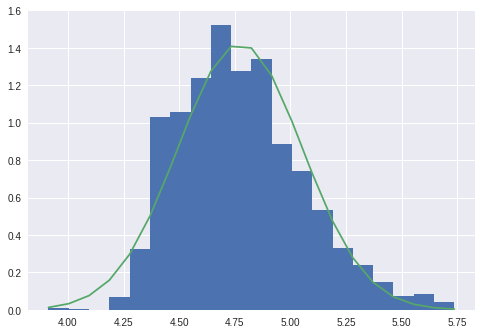

In [7]:
n, bins, patches = plt.hist(np.log(df[u'price']), bins = 20, normed =1)
mu = np.log(df[u'price']).mean()
sigma = np.log(df[u'price']).std()
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [8]:
df.drop('Unnamed: 0', axis=1,inplace=True)
df1.drop('Unnamed: 0', axis=1,inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df1.head()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,81,58,40,6.0,12.5,7,1,1,1,3
1,75,44,28,6.0,13.5,7,1,0,1,6
2,128,70,42,6.0,14.5,3,1,1,1,3
3,95,61,37,6.0,13.5,7,1,0,1,1
5,137,76,50,9.0,11.0,7,1,1,1,8


price - цена квартиры в $1000 (интервальная шкала) (результативный признак)

totsp - общая площадь квартиры, кв.м. (интервальная шкала)

livesp - жилая площадь квартиры, кв.м. (интервальная шкала)

kitsp - площадь кухни, кв.м. (интервальная шкала)

dist - расстояние от центра в км. (интервальная шкала)

metrdist - расстояние до метро в минутах (интервальная шкала)

walk 1 – пешком от метро, 0 – на транспорте (номинальня шкала)

brick 1 – кирпичный, монолит ж/б,  0 – другой (номинальная шкала)

floor 1 – этаж кроме первого и последнего, 0 – иначе. (номинальная шкала)

code - число от 1 до 8, при помощи которого мы группируем наблюдения по подвыборкам: 
1. Наблюдения сгруппированы на севере, вокруг Калужско-Рижской линии метрополитена
2. Север, вокруг Серпуховско-Тимирязевской линии метрополитена 
3. Северо-запад, вокруг Замоскворецкой линии метрополитена 
4. Северо-запад, вокруг Таганско-Краснопресненской линии метрополитена
5. Юго-восток, вокруг Люблинской линии метрополитена
6. Юго-восток, вокруг Таганско-Краснопресненской линии метрополитена
7. Восток, вокруг Калиниской линии метрополитена
8. Восток, вокруг Арбатско-Покровской линии метрополитена

(номинальная шкала)

  Обратимся к экономической интерпретации независимых признаков:
  
  1. Общая площадь квартиры, очевидно, что является одним из определяющих показателей в формировании цены за квартиру так как входит в формулу по которой цена за квартиру формируется как общая площадь умноженная на цену за квадратный метр, цену же за квадратный метр предполагается оценивать с помощью других показателей.
  
  2. Жилая площадь квартиры в квадратных метрах, является очень близкой по значимости и смыслу к обычной площади, однакохарактеризует все же несколько другой признак, у квартиры могут быть достаточно внушитеольные 80 квадратных метров общей площади, однако, если жилых из них только 50, это не может не сказаться на цене и скорее всего в отрицательную сторону, так как людям в большинстве случаев нужна именно жилая площадь.
  
  3. Также рассматривается как признак площадь кухни, что-то конкретное сказать о его вкладе в результирующий признак заранее сказать сложно, однако он сможет несколько корректировать выходные данные модели своим присутствие, может быть добавляя некой гибкости.
  
  4. Расстояние от центра имеет огромное значение в определении цены квартиры, и чем ближе к центру тем и выше цена, однако именно такое ранжирование наверное имело бы больше смысла внутри групп однородных квартир по сегментам, так как квартира в каком-нибудь доме всего в двух километрах от центра, но дом был построен в 60-ые по сравнению с супер современным жилым комплексом люксового класса, но на расстоянии 10-15 километров от центра сравнивать по этому признаку не представляется разумным.
  
  5. Расстояние в минутах до метро для большинства сегментов квартир является тоже очень важным фактором в определении стоимости, так как если человек регулярно пользуется метро, а большинство жителей Москвы так и делают, то ему удобнее жить в шаговой доступности от этого самого метро, чем в часе езды, однако этот признак опять теряет смысл при рассмотрении квартир люксового и возможно бизнес класса, так как наиболее вероятно, что жители таких квартир метро пользуются довольно редко.
  
  6. Добираться до метро пешком или на транспорте является своего рода интерпретацией предыдущего признака и является бинарным, возможно будет также неким образом корректировать значение результирующего признака, однако в значимости этого признака есть определнные сомнения.
  
  7. Признак, характеризующий материал из которого сделан дом является достаточно важным, так как квартиры в кирпичных и монолитным домах ценятся определенно выше, чем в панельных, например. Однако сам признак является бинарным и не позволяет проранжировать неким образом проранжировать в полной мере дома по матриалу постройки.
  
  8. Как принято первый и последний этажи ценятся меньше, чем все остальные, поэтому для них бонуса к цене от своего значения в значение результирующего признака.
  
  9. Последний признак распределение квартир по местоположению в Москве по линиям метро, на мой взгляд не является очень разумным, так как на мой взгляд не отражает дороговизны района, в котором располагается квартира. Однако будет интересно взглянуть на коэффициент при этом признаке. 

__Корреляционный анализ__

In [10]:
df.corr()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
price,1.000000,0.720060,0.660894,0.581537,-0.359761,-0.148604,0.190204,0.289930,0.132612,-0.088594
totsp,0.720060,1.000000,0.843102,0.771395,-0.078496,-0.012661,0.005552,0.110401,0.099512,-0.005246
livesp,0.660894,0.843102,1.000000,0.529240,-0.172110,-0.024216,0.054150,0.258808,0.076987,0.014488
kitsp,0.581537,0.771395,0.529240,1.000000,-0.030071,-0.007595,-0.015005,-0.038447,0.106500,-0.042694
dist,-0.359761,-0.078496,-0.172110,-0.030071,1.000000,0.091424,-0.176049,-0.395127,0.027772,-0.198353
metrdist,-0.148604,-0.012661,-0.024216,-0.007595,0.091424,1.000000,-0.037667,-0.062655,-0.016972,-0.006432
walk,0.190204,0.005552,0.054150,-0.015005,-0.176049,-0.037667,1.000000,0.151379,-0.021382,-0.035733
brick,0.289930,0.110401,0.258808,-0.038447,-0.395127,-0.062655,0.151379,1.000000,-0.055235,0.053846
floor,0.132612,0.099512,0.076987,0.106500,0.027772,-0.016972,-0.021382,-0.055235,1.000000,-0.046564
code,-0.088594,-0.005246,0.014488,-0.042694,-0.198353,-0.006432,-0.035733,0.053846,-0.046564,1.000000


In [11]:
df1.corr()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
price,1.000000,0.705719,0.634888,0.568138,-0.371013,-0.144377,0.180027,0.295290,0.134740,-0.074648
totsp,0.705719,1.000000,0.835110,0.764388,-0.070247,0.004130,-0.012522,0.097513,0.101401,0.004547
livesp,0.634888,0.835110,1.000000,0.508008,-0.164034,-0.010384,0.038189,0.249333,0.074607,0.025283
kitsp,0.568138,0.764388,0.508008,1.000000,-0.018119,0.004018,-0.029039,-0.057640,0.106728,-0.039177
dist,-0.371013,-0.070247,-0.164034,-0.018119,1.000000,0.089533,-0.174350,-0.398236,0.032091,-0.202875
metrdist,-0.144377,0.004130,-0.010384,0.004018,0.089533,1.000000,-0.032211,-0.059750,-0.015504,-0.010662
walk,0.180027,-0.012522,0.038189,-0.029039,-0.174350,-0.032211,1.000000,0.148733,-0.024004,-0.031773
brick,0.295290,0.097513,0.249333,-0.057640,-0.398236,-0.059750,0.148733,1.000000,-0.055592,0.058451
floor,0.134740,0.101401,0.074607,0.106728,0.032091,-0.015504,-0.024004,-0.055592,1.000000,-0.045423
code,-0.074648,0.004547,0.025283,-0.039177,-0.202875,-0.010662,-0.031773,0.058451,-0.045423,1.000000


    Как видно из матрицы парных коэффициентов корреляции, среди признаков есть как те, которые очень высоко скоррелированы с результативным признаком, такие как общая площадь и жилая площадь квартиры, площадь кухни, однако они довольно сильно коррелируют между собой, между первыми двумя даже наблюдается мультиколлинераность, что может негативно сказываться на модели, поэтому этот момент следует внимательно отслеживать и как и ожидалось у них с ценой за квартиру наблюдается положительная корреляция. У отсальных признаков наблюдается незначительная скоррелированность с результирующим признаком, которая нае превышает 0.4, среди них отрицательной корреляцией обладают расстояние до центра и время в минутах до метро, как и ожидалось, также интересен факт того, что зависимость от группировки по линиям метро не несёт практически никакой информации в определении цены, возможно, при другом распределении нумерации по ним наблюдалось бы больше отдачи, однако  для этого нужен гораздо более глубокий анализ.

In [12]:
from sklearn import preprocessing

standardized_df = pd.DataFrame(preprocessing.scale(df1),columns = [u'price', u'totsp', u'livesp', u'kitsp', u'dist',
       u'metrdist', u'walk', u'brick', u'floor', u'code'])
normalized_df1 = pd.DataFrame(preprocessing.normalize(df1,axis=0), columns=[u'price', u'totsp', u'livesp', u'kitsp', u'dist',
       u'metrdist', u'walk', u'brick', u'floor', u'code'])
df1[u'price']=np.log2(df1[u'price'])
df_norm = (df1 - df1.mean()) / (df1.max() - df1.min())

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [13]:
df_norm.corr()

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
price,1.000000,0.724175,0.642221,0.590681,-0.366861,-0.135576,0.178786,0.279705,0.144784,-0.076132
totsp,0.724175,1.000000,0.835110,0.764388,-0.070247,0.004130,-0.012522,0.097513,0.101401,0.004547
livesp,0.642221,0.835110,1.000000,0.508008,-0.164034,-0.010384,0.038189,0.249333,0.074607,0.025283
kitsp,0.590681,0.764388,0.508008,1.000000,-0.018119,0.004018,-0.029039,-0.057640,0.106728,-0.039177
dist,-0.366861,-0.070247,-0.164034,-0.018119,1.000000,0.089533,-0.174350,-0.398236,0.032091,-0.202875
metrdist,-0.135576,0.004130,-0.010384,0.004018,0.089533,1.000000,-0.032211,-0.059750,-0.015504,-0.010662
walk,0.178786,-0.012522,0.038189,-0.029039,-0.174350,-0.032211,1.000000,0.148733,-0.024004,-0.031773
brick,0.279705,0.097513,0.249333,-0.057640,-0.398236,-0.059750,0.148733,1.000000,-0.055592,0.058451
floor,0.144784,0.101401,0.074607,0.106728,0.032091,-0.015504,-0.024004,-0.055592,1.000000,-0.045423
code,-0.076132,0.004547,0.025283,-0.039177,-0.202875,-0.010662,-0.031773,0.058451,-0.045423,1.000000


In [0]:
def private_corr(dt,x,y):#частный коэффициент корреляции
  corr = np.asarray(dt.corr())
  rows1=[]
  cols1=[]
  rows2=[]
  cols2=[]
  num=corr.shape[0]
  for i in range(num):
    if(i!=x):
      rows1.append([i])
      cols2.append(i)
    if(i!=y):
      cols1.append(i)
      rows2.append([i])
  matrix1 = corr[rows1,cols1]
  matrix2 = corr[rows1,cols2]
  matrix3 = corr[rows2,cols1]
  return -1*(-1)**(x+1+y+1)*np.linalg.det(matrix1)/(np.linalg.det(matrix2)*np.linalg.det(matrix3))**(0.5)

def mnoj_corr(dt,x):#множественный коэффициент корреляции
  corr = np.asarray(dt.corr())
  rows1=[]
  cols1=[]
  num=corr.shape[0]
  for i in range(num):
    if(i!=x):
      rows1.append([i])
      cols1.append(i)
  matrix1 = corr[rows1,cols1]
  return (1-np.linalg.det(corr)/np.linalg.det(matrix1))**0.5

In [15]:
ch_coefs1=[]
for i in range(1,10):
  ch_coefs1.append(private_corr(df1,0,i))
print ch_coefs1

[0.3640784054365685, 0.014114149166184973, 0.1467397387227414, -0.4061833639390778, -0.1825516185709187, 0.20639816348969345, 0.16388567733344703, 0.14380445077758813, -0.2228118726900919]


In [16]:
ch_coefs2=[]
for i in range(1,10):
  ch_coefs2.append(private_corr(df_norm,0,i))
print ch_coefs2
df_norm.columns

[0.3640784054365519, 0.014114149166229942, 0.14673973872279328, -0.4061833639390719, -0.18255161857092003, 0.20639816348969134, 0.16388567733344797, 0.14380445077758844, -0.22281187269008976]


Index([u'price', u'totsp', u'livesp', u'kitsp', u'dist', u'metrdist', u'walk',
       u'brick', u'floor', u'code'],
      dtype='object')

    Как можно заметить частные коэффициенты разительно отличаются от парных, для общей площади квартиры коэффициент упал в два раза, для жилой площади квартиры до совсем маленьких значений, то же наблюдается и для значений коэффициента для площади кухни, это свидетельствует о том, что их значимость велика только при наличии других признаков, обладая лишь площадью квартиры сказать что-либо о её цене не представляется возможным. Для расстояния до центра коэффициент остался примерно тем же, что говорит о его независимости от других признаков и действитольной скоррелированности с ценой за квартиру, то же касается и расстоянии в минутах до метро. Для всех остальных признаков изменения тоже не оченб значительные, их скоррелированность с результирующим признаком осталась на низком уровне, однако для группировки по районам она все же выросла почти в три раза, в связи с чем можно сказать, что остальные признаки уменьшают его влияние на цену. 

__Множественный коэффициент корреляции__

In [17]:
print mnoj_corr(df_norm,0)

0.8325577835013843


In [18]:
print mnoj_corr(df1,0)

0.8325577835013865


R2

In [19]:
print mnoj_corr(standardized_df,0)
print mnoj_corr(df1,0)**2

0.8199157084656524
0.6931524628687417


# Регрессионный анализ

In [0]:
from sklearn.linear_model import LinearRegression

y = df_norm[u'price']
x = df_norm[['totsp', u'livesp', u'kitsp', u'dist',
       u'metrdist', u'walk', u'brick', u'floor', u'code']]

In [0]:
from sklearn.model_selection import train_test_split

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  after removing the cwd from sys.path.


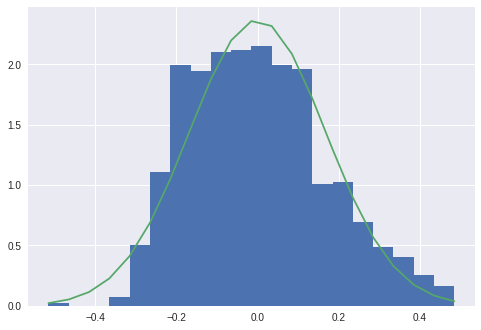

In [22]:
n, bins, patches = plt.hist(y, bins = 20, normed =1)
mu = y.mean()
sigma = y.std()
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True, random_state=666)

In [0]:
lin_reg = LinearRegression()

In [25]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
lin_reg.score(X_test,y_test)

0.7012230951169571

In [27]:
lin_reg.coef_

array([ 0.74857247,  0.04162971,  0.17243277, -0.19316571, -0.08831145,
        0.04158515,  0.03251203,  0.03610477, -0.06897166])

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,lin_reg.predict(X_test))

0.7012230951169571

In [29]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=3)
ridge.fit(X_train, y_train)
ridge.coef_
ridge.predict(X_test)
print
ridge.score(X_test,y_test)

0.7008568179242087

F-тест уравнения регрессии

In [30]:
m=9
n=df_norm.shape[0]
print n

1986


In [0]:
y_pred = lin_reg.predict(x)


In [0]:
Fn=(sum( (y.mean()-y_pred)**2 )/m )/(sum((y-y_pred)**2)/(n-m-1))

In [33]:
print Fn

478.3837416289166


In [34]:
1

1

In [0]:
def S_ost(y_pred,y,n,m):
  return (sum( (y-y_pred)**2 )/(n-m-1))**0.5

In [0]:
s_ost = S_ost(y_pred,y,n,m)

In [37]:
print s_ost

0.0936742021425


In [0]:
x_stds = x.std()

In [0]:
mas = []
for i in range(9):
  mas.append(abs(lin_reg.coef_[i])/(s_ost/(n**0.5*x_stds[i])))

In [40]:
print mas

[44.462649976937996, 2.3372529558368083, 10.575624960340656, 22.029208416074198, 8.392055038669179, 9.21345194196449, 7.1878746194339795, 7.028115632174459, 10.256260947775926]


In [41]:
print n

1986


Табличное значение t примерно 1.96, все коэффициенты являются значимыми

Проверка значимости свободного члена уравнения регрессии

In [42]:
lin_reg.intercept_

-0.0025412762440204907

Оценка качества регрессионной модели

In [0]:
R2 = 1-sum((y-y_pred)**2)/sum((y-y.mean())**2)

In [46]:
print R2

0.692441012341


In [48]:
R2/(1-R2)*(n-m-1)/m

494.30931058572554

In [49]:
lin_reg.coef_

array([ 0.74857247,  0.04162971,  0.17243277, -0.19316571, -0.08831145,
        0.04158515,  0.03251203,  0.03610477, -0.06897166])

In [50]:
x.columns

Index([u'price', u'totsp', u'livesp', u'kitsp', u'dist', u'metrdist', u'walk',
       u'brick', u'floor', u'code'],
      dtype='object')